# Fractal Geometry of Cumulus Clouds

In [1]:
from IPython.display import Image

## 1. Methodology

 The data used in this notebook are from on a high-resolution, large-eddy simulation run using the System of Atmospheric Modelling (SAM; Khairoutdinov and Randall, 2003). The model was configured to simulate a boundary-layer atmosphere according to BOMEX case data (Holland and Rasmusson, MWR, 1973). The analysis has been performed on two different runs: one at 12.8 km $\times$ 12.8 km $\times$ 3.2 km at 25 m resolution for 12-hours, and one at 6.4 km $\times$ 6.4 km $\times$ 3.2 km at 12.5 m resolution for 6 hours. In both simulations, the model spin-up times were roughly three hours, which is not included in the analysis. 

 The following experiments have been repeated for marine boundary-layer cumulous clouds (CGILS; Blossey et al., 2013) and boundary-layer clouds over a diurnal cycle over land (ARM; Brown et al., 2002) as well. However, seeing that the results do not differ significantly from what is being presented here, they won't be shown for brevity.

 Unfortunately, the analysis has been repeated multiple times. The suggested project would have been done a model cloud; for example, assuming that we know that the clouds display fractal structure with a known fractal dimension, we could construct artificual shapes with contourted surfaces that will product the right fractal properties according to our assumptions (e.g. Soneira and Peebles, 1978). However, this assumes that (1) individual clouds (as opposed to observed cloud field) behave like fractals and (2) we know exactly their fractal properties beforehand. 
 
 Since we performed multiple simulations and found interesting and unexpected results (*cf.* Section 2.3.), I decided to work with the actual measurements taken from the LES simulations. Still, I found that the properties of the simulated cumulus clouds correspond well to earlier studies as well as satellite observations, which assures us that the turbulent properties of the *individual* simulated clouds are realistic representations of the turbulence during moist convection.   

 The questions related to this project have been re-arranged slightly, in order to keep this notebook logically organized. 

# 2. Results
## 2.1. Fractal Nature of Cumulus Clouds
> #### Consider processes as shown in Crum Stull & Eloranta 1987, “Coincident lidar and aircraft observations of entrainment into thermals and mixed layers” (JAS): 
> #### Compute the fractal dimension of the contorted perimeter of a thermal, and compare it with the fractal dimension of a simple circle.

 First, we need to ensure that the simulated clouds do indeed have fractal structure. Previous studies using simulated cloud fields (Siebesma and Jonker, 2000) and satellite observations (Lovejoy, 1982; von Savigny et al., 2011; Brinkhoff et al., 2015) have shown that this is indeed the case, but it should be meaningful to show that individual cloud volumes and surfaces have fractal structures.
 
 In order to track the individual cloud histories, we applied the cloud-tracking algorithm initially developed by Dawe and Austin (2012). I have since modified this algorithm extensively, but the heuristics used in determining the tracked volume remains consistent with the original work. Using the cloud-tracking algorithm, we can obtain detailed information about the properties of individual clouds as they develop. For the sake of this work, we focus on the fractal nature of the individually observed clouds.
 
 A generic cloud property $\psi(x, y, z, t)$ is normally integrated over the horizontal cloud region at every time step, giving a simple two-dimensional variable $\psi(z, t)$. That is, we evaluate the individual cloud properties at every height in each time step taken for the simulation. The distribution of $\psi$ are therefore not entirely independent to each other, but the posterier distribution should still be statistically significant given a large enough dataset.
 
 We use the box counting method to calculate the fractal dimension $\mathcal{D}_\mathrm{box} \approx \mathcal{D}_f$ (hereafter $\mathcal{D}_f$ for brevity), also called the Minkowski–Bouligand dimension.
 
 Given a fractal set $\mathcal{S}$, the box-counting dimension can be calculated by counting how many boxes (grid cells in our case) are required to cover the set, and observing how this number changes as the size of the box changes. If $N(l)$ is the number of cells with spatial scale $l$ needed to cover the whole set $\mathcal{S}$, then the box-counting dimension can be defined as:
 
$$
\mathcal{D}_f = - \lim_{l \to 0} \frac{\log_{10} N(l)}{\log_{10} l}.
$$

where $\log$ does not need to be of base $10$, but has been chosen so that it is consistent with the rest of the calculation.

 In practice, since we are dealing with the results from large-eddy simulations, the spatial scale $l$ cannot be smaller than the resolution of the LES model $l_0$. In this regard, we can assume that the results are accurate up to the model's resolution ($l_0 = 12.5$ m and $25$ m). I have also tried interpolating the cloud surface to get the scale down to $l_0/2$, but the results were unsatisfactory as the interpolated surface is smoothed out.
 
 For this reason, the measurements of $\mathcal{D}_f$ are performed over the scaling lengths between $l_0$ and $R$, where $R$ is the radius of the parcel. Because the shape of the observed clouds is not cylindrical, however, we need to estimate the radius of the individual clouds. There are two ways to calculate the radius. We can simply calculate the square root of horizontal area, or $r_g = \sqrt{A}$, called the *geometric radius*, or we can calculate the *average radial distance* of all the individual points within the cloud. That is,
 
$$
r_d = \sqrt{\frac{1}{N} \sum_{i=1}^{N} r_i^2}
$$

where $N$ is the number of points in the cloud and $r_i$ is the distance between a point $i$ and the center of the cloud. 

 The following figure shows the two estimates for cloud radius for a sample cloud:

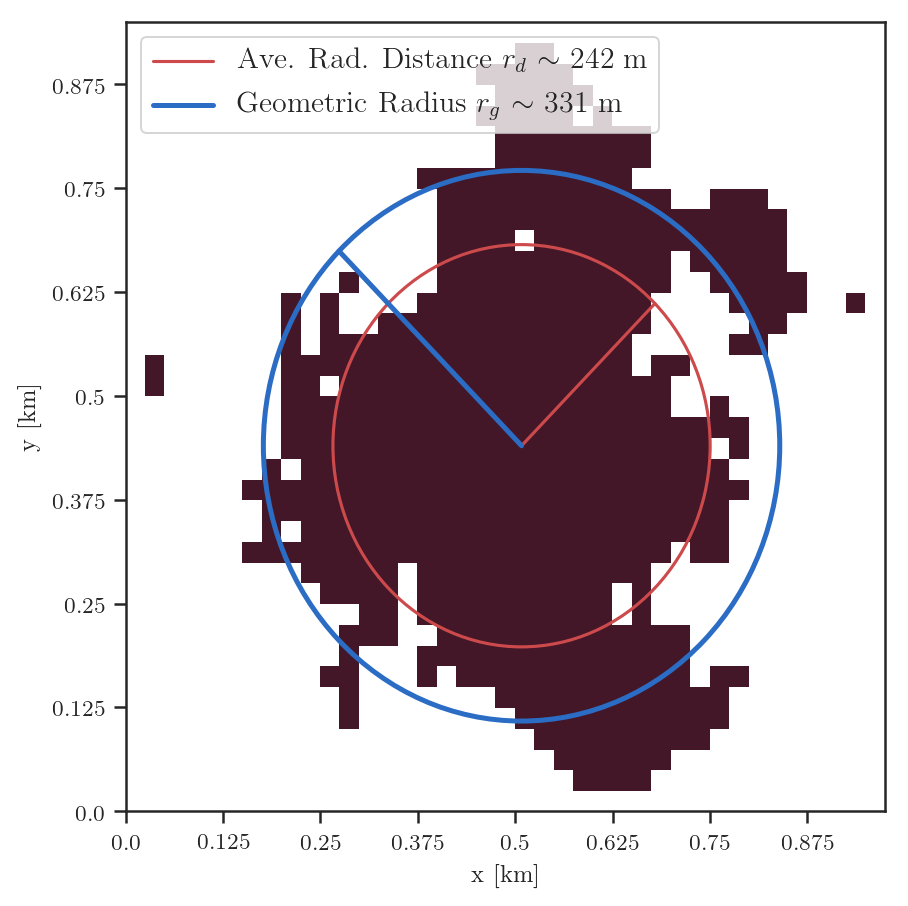

In [2]:
Image(filename='../png/plot_observed_cloud.png')

 Normally, the geometric radius $r_g$ is larger than the average radial distance $r_d$. It is because the former is the radius of a circle with the same area as the observed cloud, whereas the latter is an estimate of the *effective* radius of a stretched-out region.
 
 Unless otherwise noted, we are using the geometric radius, as we find it works naturally better as a proxy to the cloud size.

 Perhaps it might be more accurate to calculate the correlation integral:
 
$$
\mathcal{C}(r) = \frac{2}{N (N - 1)} \sum_{1 \leq i < j \leq N} H(r - | \pmb{x}_i - \pmb{x}_j |)
$$

where $H$ is the Heaviside step function, $N$ is the number of points in the observed cloud, and $\pmb{x}$ is the position of a point. However, while the box counting method is sensitive to the placement of the grid and the scaling of the box size, the particular set of parameters chosen here appear to be accurate enough for our purpose. This seems to be because we are dealing with connected regions of the cloud, not point distributions.

 Nonetheless, the following figures show the result of applying the box-counting method to 12-hour and 12.5-m simulation results, respectively.

### Figure 1.1. 12-hr, 25-m Run

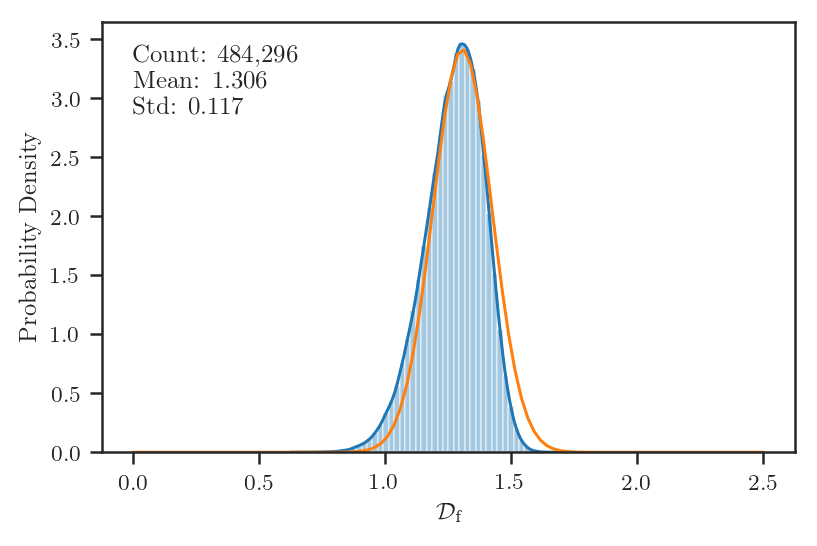

In [3]:
Image(filename='../png/fdim_histogram_12hr.png')

### Figure 1.2. 6-hr, 12.5-m Run

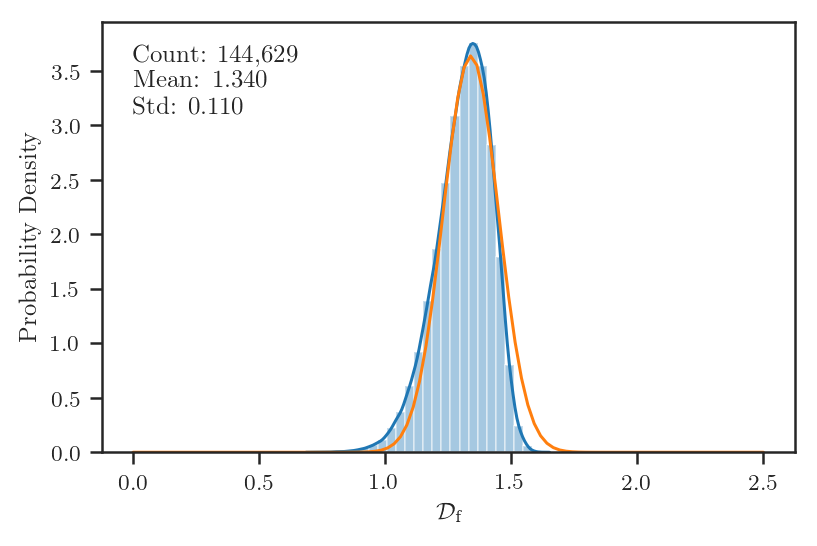

In [5]:
Image(filename='../png/fdim_histogram_hres.png')

 The blue curves denote the number of clouds observed in each bin, and the orange curves represent Gaussian distributions with the corresponding mean $\mu$ and the standard deviation $\sigma$.
 
 The results correspond well to the previous observations. Individual clouds seem to have the fractal dimension $\mathcal{D}_f$ between $1.2$ and $1.4$, with the mean being roughly $1.33$. The exact value of $\mathcal{D}_f$ seems to vary among the cases we have tested, but it remains very close to $1.33$ regardless.
 
 The 12-hour BOMEX simulation has slightly smaller fractal dimension, but interestingly, this seems to be because we have a longer simulation, not because the resolution is relatively lower. When we sample the first six hours of the simulation after a three-hour spin-up, we measure $\mathcal{D}_f=1.325$, which is much closer to the high-resolution case. This is an interesting result, and will be discussed later.
 
 The simulated clouds, as previous observations suggest, appear to be fractals. If the clouds were cylindrical (i.e. if the horizontal shapes were circular), we would observe $\mathcal{D}_f=1$, simply because a circle is a one-dimensional curve.
 
 We should also note that, naturally, this is very close to the fractal dimension of the surface of a Brownian motion. This seems to support an observation that turbulent flows are fractals (Sreenivasan and Meneveau, 1986), which also suggests that we are indeed observing turbulent properties of the individual clouds.

## 2.2. Properties of Fractal Dimension
> #### Assume that the aircraft and lidar could see only the larger size lobes and entrained blobs; and assume that the actual contorted shape is fractal-like with similar shaped contortions of ever-smaller spatial scales that exist in the real thermal, but which the lidar and aircraft cannot resolve.
> - Write or adapt a simple computer program to draw/plot the contorted shape of the thermal that includes the superposition of all the scales of contortion, from the scale of the diameter R of the whole thermal down to some smaller turbulence scale L that you set as a parameter. But try to make your model be consistent with the measurements reported by Crum et al.

 As previously mentioned, given the nature of large-eddy simulations, we assume the set of scaling length $l \in \{l_0, l_0 + 1, \dots, R\}$. The model resolutions are $25$ m and $12.5$ m for the two cases we present here. While the instrumented aircraft and lidar measurements offer better resolutions, with the maximum resolution being 7.5 m for the lidar and smaller for the aircraft, they come with inherent instrumental and observational noise. In that aspect, we consider the $12.5$ m resolution rather adequte for this study. And as we will see, the fractal properties of clouds observed at $25$ m resolution are consistent to those from the high-resolution run. To study the fractal nature of cumulus clouds, this appears to be a high enough resolution.
 
 Then, what does the observed cloud look like at different scales? The following figure shows two sample clouds from the two model runs, with increasing scale length $l \in \{l_0, l_0 + 1, \dots, R\}$ to make a coarse-resolution observation.

### Figure 2.1. 12-hr, 25-m Run

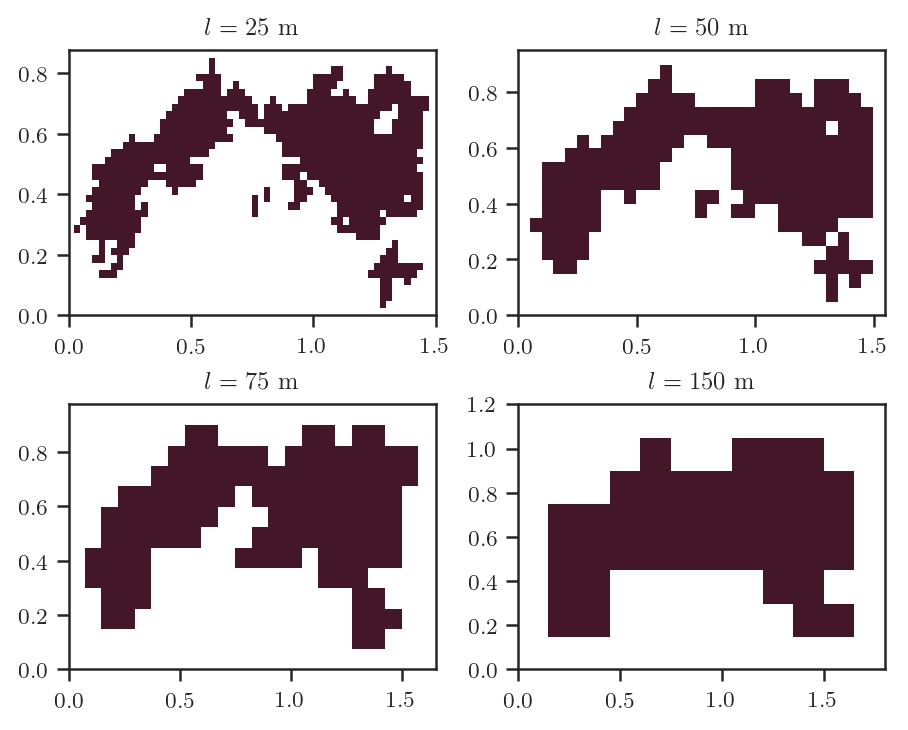

In [8]:
Image(filename='../png/plot_coarse_resolutions_12hr.png')

### Figure 2.2. 6-hr, 12.5-m Run

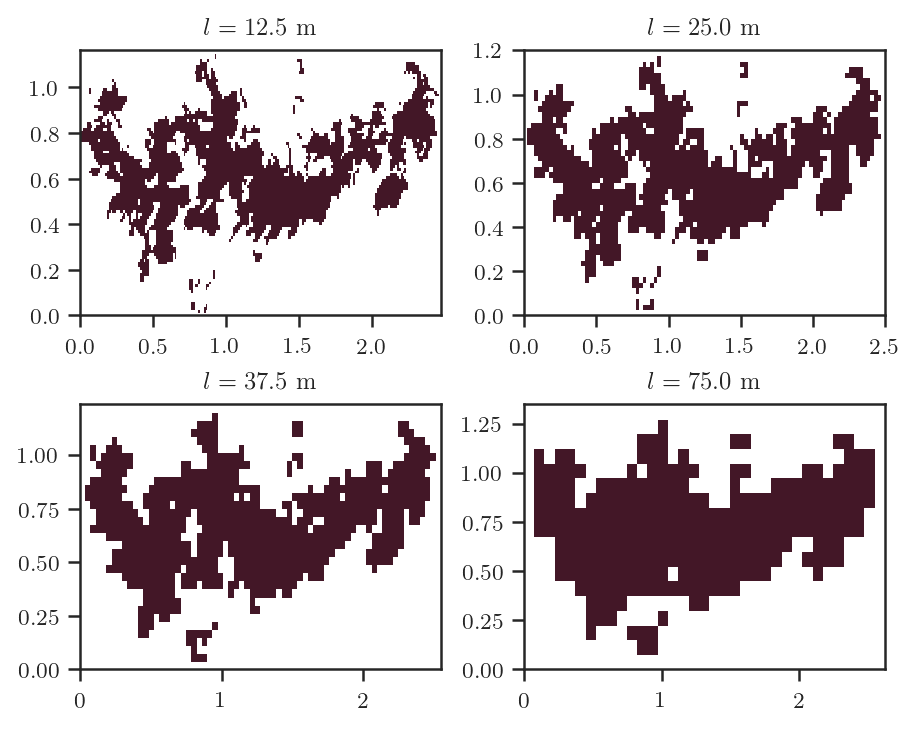

In [7]:
Image(filename='../png/plot_coarse_resolutions_hres.png')

 One unfortunate limitation in making coarse-resolution observations is that the set of scaling lengths $l$ has to be integer multiples of the model resolution $l_0$. There are a few different ways to resolve this. For example, It won't be an issue when the model resolution is higher (so that the set of scaling lengths $l$ is relatively denser) or if the observed clouds are much larger. We do currently have an output from the deep tropical marine convection during GATE on a 90-km domain, and two BOMEX simulations over a 32-km domain, but the output data need to be further processed and that will take a few weeks.
 
 Both clouds shown above are taken at 4 hours into the simulations. It should be noted that the higher-resolution, 12.5-m simulation provides a more detailed representation of the smaller eddies present in the cloud, but that's most likely because in the 25-m simulation, the clouds are more likely to be broken up into smaller regions. This is due to the descrete nature of the LES model run.
 
 Nevertheless, the box counting method is repeated over the entire set of scaling lengths $l \in \{l_0, l_0 + 1, \dots, R\}$ to estimate the fractal dimension (see Figure 1). We repeat the coarse-resolution observations above for all the clouds, which allows us to construct a statistically significant distribution of the fractal dimension $\mathcal{D}_f$.

### Figure 3. Fractal Dimension of a Cloud Sample

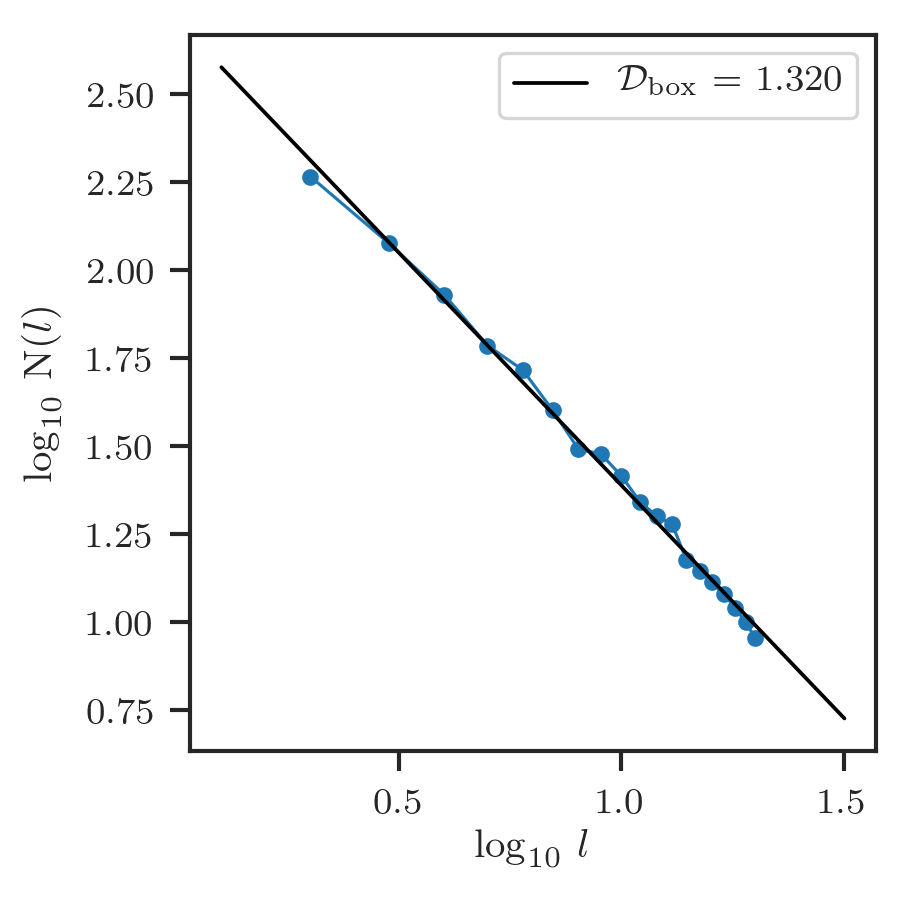

In [8]:
Image(filename='../png/calc_fdim.png')

## 2.3. Area-Perimeter Relationship
> - Use your computer program to calculate the length P of the perimeter of the contorted shape as a function of L/R.
> - Also find the relationship between P and fractal dimension, if any.

 We could also measure the perimeter $P$ of the individual cloud slice $\psi(z, t)$ observed over a set of scaling lengths $l \in \{l_0, l_0 + 1, \dots, R\}$. This gives an estimate of a fractal dimension, which we will call the perimeter dimension $\mathcal{D}_p$. This is easy to do, as the perimeter of the fractal surface can be calculated by simply counting the sides of each grid cell between the cloudy region and the dry environment. 
 
 Because the grid size increases as the scaling length increases (as $l_0 \cdot l$, for $l \in \{l_0, l_0 + 1, \dots, R\}$, we examine the relationship between $l$ and the perimeter for each cloud as $l$ increases from $l_0$ to $R$. 
 
 This analysis resembles calculating the fractal dimension using the box counting method, as we are interested in the slope between the perimeter $P$ and the length scale $l$ as $l$ changes. One might think of this as a *perimeter dimension* $\mathcal{D}_p$, where

$$
\mathcal{D}_p= - \lim_{l \to 0} \frac{\log_{10} P(l)}{\log_{10} l}
$$

which describes how long the perimeter of the cloud remains (i.e. how complex the boundary between the cloud and the environment is) as the resolution of the model becomes coarser. The above relationship transtates to

$$
P(l) \propto l^{\mathcal{D}_p}.
$$

The following figure calculates the slope $\mathcal{D}_p$ for the same cloud as above. 

### Figure 4. Perimeter Dimension of a Cloud Sample

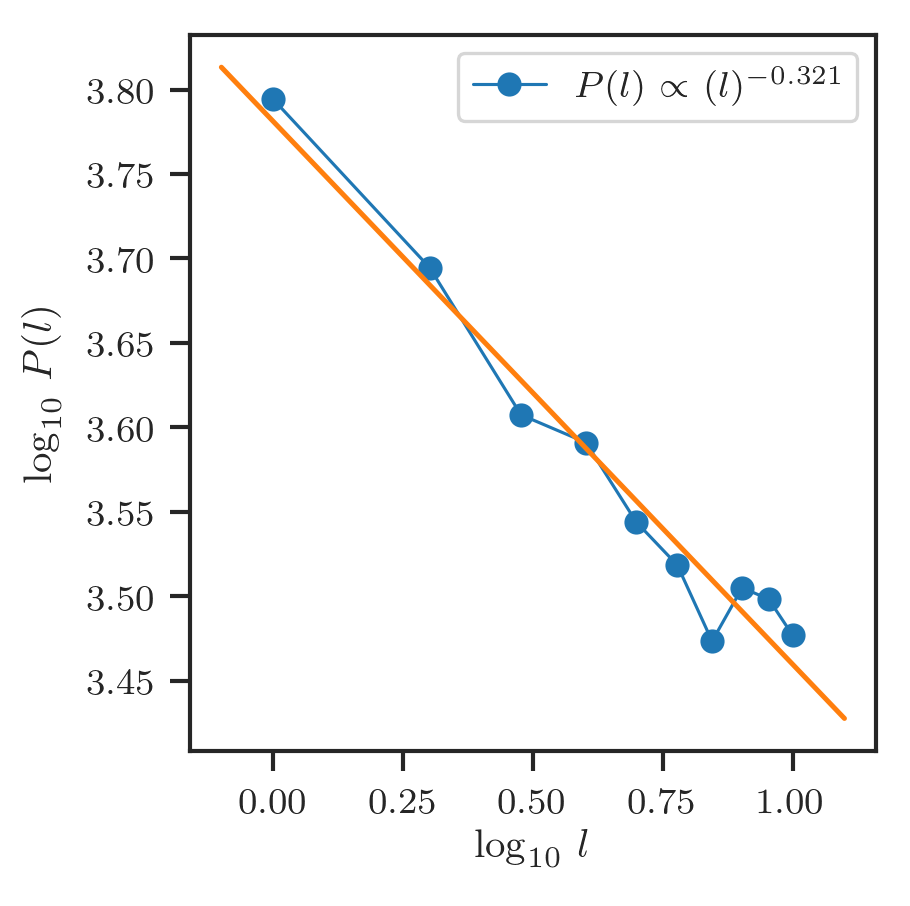

In [18]:
Image(filename='../png/calc_pdim.png')

 It should be noted that the calculation of $\mathcal{D}_p$ is much more sensitive to the choice of $l \in \{l_0, l_0 + 1, \dots, R\}$ because once the resolution becomes coarse enough (which is normally around $l \sim R/2$), the perimeter of the observed cloud does not change as the scaling length becomes larger. This is most likely because once the box becomes big enough, we can no longer observe the smaller eddies present in the parcel. This is why in the above figure, the scaling length $\log_{10} l$ only goes up to roughly $1$, as opposed to $1.5$ for the calculation of fractal dimension. We will discuss this further in the next section.
 
 It is not surprising that the perimeter of the observed cloud decreases as the scaling length increases; as $l$ increases and becomes closer to $R$, the smaller contortions are hidden, which results in a smoother boundary between the cloud and the environment.
 
 We can repeat the calculation of $\mathcal{D}_p$ for all the individual clouds. Unfortunately, since we can no longer use the full set of scaling lengths $l \in \{l_0, l_0 + 1, \dots, R\}$, the number of cloud samples used is smaller this time around. We also observed that a portion of our samples are simply too small for this type of analysis.

### Figure 5.1. Perimeter Dimension in 12-hr Run

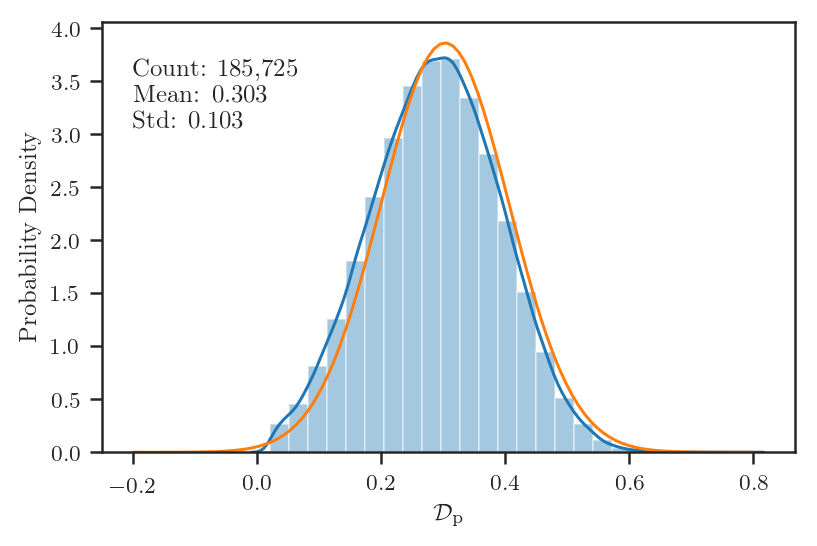

In [19]:
Image(filename='../png/pdim_histogram_12hr.png')

### Figure 5.2. Perimeter Dimension in 12.5-m Run

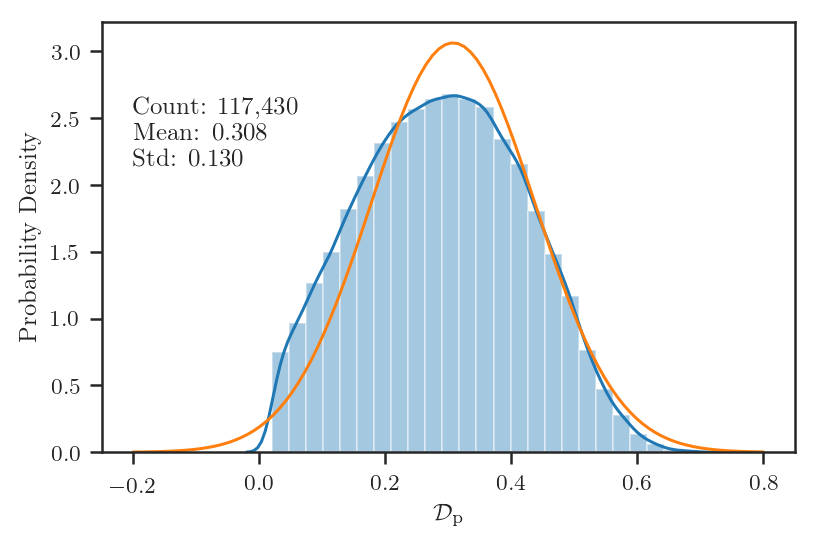

In [20]:
Image(filename='../png/pdim_histogram_hres.png')

 As previously noted, the variability in $\mathcal{D}_p$ is much higher than $\mathcal{D}_f$, given that the dimension is much smaller. This seems to be because the calculation is sensitive to the size and the shape of the cloud sample. 
 
 It is probably not appropriate to name this a perimeter *dimension*, but interestingly enough, we have $\mathcal{D}_f \approx \mathcal{D}_p + 1 = 1.31$, which reminds us of the isotropy assumption $\mathcal{D}_s = \mathcal{D}_f + 1$, where the volume-surface dimension $\mathcal{D}_s$ is simply of a higher dimension (Siebesma and Jonker, 2000). Perhaps we are observing the same phenomena here on a lower dimension (that is, this is related to how the smallest patches/points are distributed in the cloud sample), although we could have a better understanding about the perimeter dimension $\mathcal{D}_p$ once we have a larger dataset including larger cloud samples, given the large variability in our $\mathcal{D}_p$ distribution.

 We can further look at the perimeter estimates in terms of the fractal nature of cloud samples by examining the area-perimeter relationship. For fractal shapes, it is well-known that the area $A$ and its perimeter $P$ satisfies the following relationship:
 
$$
A \propto P^{2/\mathcal{D}_2}.
$$

 Since this is easier to observe, satellite measurement studies have measured this dimension (Lovejoy, 1982; von Savingny et al., 2011; Brinkhoff et al., 2015) to be very consistently close to $4/3 \sim 1.33$, which corresponds well to our estiamte of fractal dimension $\mathcal{D}_f$ shown in Figure 1. 

## 2.4. Properties of the Shell Air
> - Define some intermediate scale S such that L < S < R. Further suppose that all scales of contortion smaller than S represent “shell” air (the cylindrical shell around the outside of the thermal that contains a mixture of thermal and environmental air), while all scales of contortion greater than S represent the contorted boundary between thermal air and environmental air. Describe and plot how the relative amount of entrained air varies with S?
> - Based on your computer model, is there some radius r where r < R, such that essentially no entrained air is found inside a circle of radius r? If so, do you anticipate that this radius r would decrease with height inside the thermal, while R increases with height?

## 2.5. Height of Cloud Base as LCL Height
> #### Regarding Stull & Eloranta 1985 NWD, consider their findings that lidar-observed cloud base is almost exactly equal to the theoretical LCL height. But this theoretical LCL height assumes undiluted air in the thermal. Namely, there is no entrainment into a protected core of the thermal.
> Discuss how your model from question (2) gives results that are consistent with the findings of Stull and Eloranta

## 2.6. Entrained Air PDFs
> #### Consider the observations of entrainment into the top of the mixed layer (as given by many of the other readings that I assigned), and how probability distributions (e.g., LCL zone and Entrainment zone EZ) can be found as a function of height.  
> - Use that same concept of probability distributions to describe air entrained laterally into a thermal or cumulus cloud, and thermal air detrained into the environment.
> - Discuss how this conceptual model might or might not be different for lateral entrainment into cumulus clouds.

## 3. Remarks

 - Fractal dimension changes over the course of the simulation
 - Perimeter-area relationship does not hold for individualc clouds

# Bibliography
- Blossey, P. N., and Coauthors, 2013: Marine low cloud sensitivity to an idealized climate change: The CGILS LES intercomparison. J. Adv. Model. Earth Syst, 5, 234–258, doi:10.1002/jame.20025.
- Brinkhoff, L. A., C. von Savigny, C. E. Randall, and J. P. Burrows, 2015: The fractal perimeter dimension of noctilucent clouds: Sensitivity analysis of the area–perimeter method and results on the seasonal and hemispheric dependence of the fractal dimension. J. Atmospheric Sol.-Terr. Phys, 127, 66–72, doi:10.1016/j.jastp.2014.06.005.
- Brown, A. R., and Coauthors, 2002: Large-eddy simulation of the diurnal cycle of shallow cumulus convection over land. Q. J. R. Meteorol. Soc, 128, 1075–1093, doi:10.1256/003590002320373210. http://doi.wiley.com/10.1256/003590002320373210.
- Crum, T. D., and R. B. Stull, 1987: Field Measurements of the Amount of Surface Layer Air versus Height in the Entrainment Zone. J. Atmos. Sci, 44, 2743–2753, doi:10.1175/1520-0469(1987)044<2743:fmotao>2.0.co;2.
- Crum, T. D., R. B. Stull, and E. W. Eloranta, 1987: Coincident Lidar and Aircraft Observations of Entrainment into Thermals and Mixed Layers. J. Appl. Meteor. Climatol, 26, 774–788, doi:10.1175/1520-0450(1987)026<0774:claaoo>2.0.co;2.
- Dawe, J. T., and P. H. Austin, 2012: Statistical analysis of an LES shallow cumulus cloud ensemble using a cloud tracking algorithm. Atmos. Chem. Phys, 12, 1101–1119, doi:10.5194/acp-12-1101-2012.
- Heus, T., and A. Seifert, 2013: Automated tracking of shallow cumulus clouds in large domain, long duration large eddy simulations. Geosci. Model Dev, 6, 1261–1273, doi:10.5194/gmd-6-1261-2013.
- Holland, J. Z., and E. M. Rasmusson, 1973: Measurements of Atmospheric Mass, Energy, and Momentum Budgets Over a 500-Kilometer Square of Tropical Ocean. Mon. Wea. Rev, 101, 44–55, doi:10.1175/1520-0493(1973)101<0044:MOTAME>2.3.CO;2.
- Jonker, H. J. J., T. Heus, and P. P. Sullivan, 2008: A refined view of vertical mass transport by cumulus convection. Geophys. Res. Lett, 35, L07810, doi:10.1029/2007GL032606.
- Khairoutdinov, M. F., and D. A. Randall, 2003: Cloud Resolving Modeling of the ARM Summer 1997 IOP: Model Formulation, Results, Uncertainties, and Sensitivities. J. Atmos. Sci, 60, 607–625.
- Lovejoy, S., 1982: Area-Perimeter Relation for Rain and Cloud Areas. Science, 216, 185–187, doi:10.1126/science.216.4542.185. http://www.jstor.org/stable/1687952.
- Siebesma, A. P., and H. J. J. Jonker, 2000: Anomalous Scaling of Cumulus Cloud Boundaries. Phys. Rev. Lett, 85, 214–217, doi:10.1103/PhysRevLett.85.214.
- Soneira, R. M., and P. J. E. Peebles, 1978: A computer model universe $-$ Simulation of the nature of the galaxy distribution in the Lick catalog. Astron. J, 83, 845, doi:10.1086/112268.
- Sreenivasan, K. R., and C. Meneveau, 2006: The fractal facets of turbulence. J. Fluid. Mech, 173, 357, doi:10.1017/S0022112086001209.
- von Savigny, C., L. A. Brinkhoff, S. M. Bailey, C. E. Randall, and J. M. Russell, 2011: First determination of the fractal perimeter dimension of noctilucent clouds. Geophys. Res. Lett, 38, doi:10.1029/2010GL045834.